# Analyzing Model Complexity with Learning Curves (BONUS)

Daha geniş, daha farklı parametre setleri vererek auc değerine göre öğrenme eğrilerini oluşturarak model karmaşıklığını (overfite düşüp düşmeme durumunu) değerlendirmek amacıyla learning curve'leri kullanacağız.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

warnings.simplefilter(action='ignore', category=Warning)

# from xgboost import XGBClassifier
# !pip install lightgbm
# from lightgbm import LGBMClassifier
# !pip install catboost
# from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv("datasets/diabetes.csv")

In [3]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [4]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
    model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)
    
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    
    plt.plot(param_range, mean_train_score,
            label="Training Score", color="b")
    
    plt.plot(param_range, mean_test_score,
            label="Test (Validation) Score", color="g")
    
    plt.title(f"Test (Validation) Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

In [5]:
rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                ["max_features", [3, 5, 7, "auto"]],
                ["min_samples_split", [2, 5, 8, 15, 20]],
                ["n_estimators", [10, 50, 100, 200, 500]]]

In [6]:
rf_model = RandomForestClassifier(random_state=17)

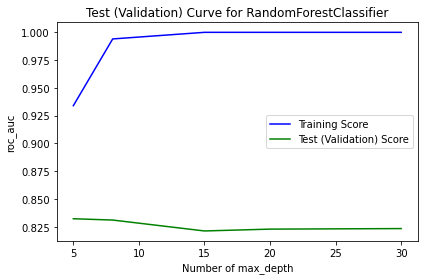

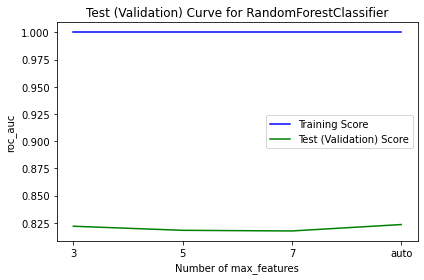

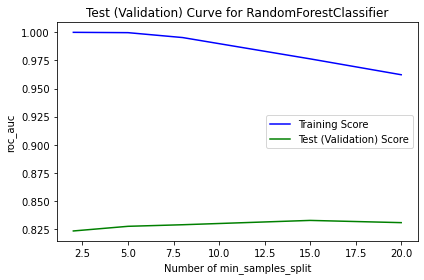

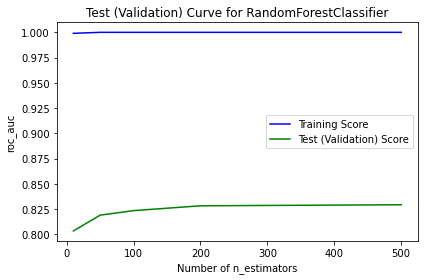

In [7]:
for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])